In [1]:
#Exercise 1
class F:
    def __init__(self, a, w):
        self.a = a 
        self.w = w
        
    def value(self, x):
        return (e ** (-(self.a*x)))*sin(self.w*x)
    

from math import *
f = F(a=1.0, w=0.1)
print (f.value(x=pi))
f.a = 2
print (f.value(pi)) 

0.013353835137035551
0.0005770715401197444


In [2]:
#Exercise 2
class Account:
    def __init__(self, name, account_number, initial_amount, transactions):
        self.name = name
        self.no = account_number
        self.balance = initial_amount
        self.transactions = transactions
        
    def deposit(self, amount):
        self.balance += amount
        self.transactions += 1
            
    def withdraw(self, amount):
        self.balance -= amount
        self.transactions += 1
            
    def dump(self):
        s = '%s, %s, balance: %s, transactions: %s' % (self.name, self.no, self.balance, self.transactions)
        print (s)
a1 = Account("John Olsson", "19371554951", 20000, 0)
a2 = Account("Liz Olsson", "19371564761", 20000, 0)
a1.deposit(1000)
a1.withdraw(4000)
a2.withdraw(10500)
a1.withdraw(3500)
print ("a1’s balance:", a1.balance)
a1.dump()
a2.dump()

a1’s balance: 13500
John Olsson, 19371554951, balance: 13500, transactions: 3
Liz Olsson, 19371564761, balance: 9500, transactions: 1


In [3]:
#Exercise 3
class Line():
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
        
    def value(self, x):
        self.a = (self.p2[1]-self.p1[1])/(self.p2[0]-self.p1[0])
        self.b = self.p1[1] -self.p1[0]*self.a
        return self.a*x + self.b
        
line = Line((0,-1), (2,4))
print (line.value(0.5), line.value(0), line.value(1))    

0.25 -1.0 1.5


In [5]:
#Exercise 4: almost done
from math import log
class Central():
    def __init__(self, f, h = 0.001):
        self.h = h
        self.f = f
    def df(self, x): 
        self.x = x
        return ((self.f(self.x + self.h)-self.f(self.x - self.h))/(2*self.h))
        
def application_1():
    def f(x):
         return 0.25*x**4
    df = Central(f)

    for x in (1, 5, 10):
        df_value = df.df(x)
        exact = x**3
        print("f’(%d)=%g (error=%.2E)" % (x, df_value, exact-df_value))
        
def application_2():
    def y(x):
        return log(x)

    for h in [0.5, 0.1, 10**(-3), 10**(-5), 10**(-7), 10**(-9), 10**(-11)]:
        x = 10
        dy = Central(y, h)
        dy_value = dy.df(x)
        exact = 1/x
        print("f’(%d)=%g (error=%.2E)" % (x, dy_value, exact-dy_value))

In [4]:
#test that it works to import the exercise as modules
import EX4
EX4.application_1()
EX4.application_2()

f’(1)=1 (error=-1.00E-06)
f’(5)=125 (error=-5.00E-06)
f’(10)=1000 (error=-1.00E-05)
f’(10)=0.100083 (error=-8.35E-05)
f’(10)=0.100003 (error=-3.33E-06)
f’(10)=0.1 (error=-3.33E-10)
f’(10)=0.1 (error=8.23E-12)
f’(10)=0.1 (error=6.08E-10)
f’(10)=0.1 (error=-8.27E-09)
f’(10)=0.0999867 (error=1.33E-05)


In [5]:
#Exercise 5
import numpy as np
from textwrap import dedent

class MinMax():
    def __init__(self, f, a, b, n):
        self.f = f
        self.a = a
        self.b = b
        self.n = n
        self._find_extrema()
  
      
    def _find_extrema(self):
        self.pmax = pmax = []
        self.pmin = pmin = []
        self.fmax = fmax = []
        self.fmin = fmin = []
        
        x = (np.linspace(self.a, self.b, self.n))
        for i, xi in enumerate(x[1:-1]):
            if self.f(x[i-1]) < self.f(x[i]) > self.f(x[i+1]):
                pmax.append(x[i])
                fmax.append(self.f(x[i]))
            elif self.f(x[i-1]) > self.f(x[i]) < self.f(x[i+1]):
                pmin.append(x[i])
                fmin.append(self.f(x[i]))
        if self.f(self.a) > self.f(x[1]):
            pmax.append(self.a)
            fmax.append(self.f(self.a))
        elif self.f(self.a) < self.f(x[1]):
            pmin.append(self.a)
            fmin.append(self.f(self.a))
        if self.f(self.b) > self.f(x[-2]):
            pmax.append(self.b)
            fmax.append(self.f(self.b))
        elif self.f(self.b) < self.f(x[-2]):
            pmin.append(self.b)
            fmin.append(self.f(self.b))
    
                                     
    def get_global_minimum(self):
        try:
            pmin = list(self.pmin)
            return max(pmin[:-1])
        except ValueError:
            return "No Global Minimum"
    def get_global_maximum(self):
        try:
            pmax = list(self.pmax)
            return max(pmax[:-1])
        except ValueError:
            return "No Global Maximum"
    def get_all_minima(self):
        pmin = self.pmin
        return self.pmin
    def get_all_maxima(self):
        return self.pmax
    def __str__(self): 
        min = []
        max = []
        for i in self.get_all_minima():
            j = round(i, 4)
            min.append(j)
        for i in self.get_all_maxima():
            j = round(i, 4)
            max.append(j)
        try:
            return dedent(f"""
            All minima: {', '.join(f'{v:}' for v in min)}
            All maxima: {', '.join(f'{v:}' for v in max)}
            Global minimum: {round(self.get_global_minimum(), 4)}
            Global maximum: {round(self.get_global_maximum(), 4)}
            """)
        except TypeError:
            pass
        try:
            return dedent(f"""
            All minima: {', '.join(f'{v:}' for v in min)}
            All maxima: {', '.join(f'{v:}' for v in max)}
            Global minimum: {round(self.get_global_minimum(), 4)}
            Global maximum: {self.get_global_maximum()}
            """)
        except TypeError:
            pass
        try:
            return dedent(f"""
            All minima: {', '.join(f'{v:}' for v in min)}
            All maxima: {', '.join(f'{v:}' for v in max)}
            Global minimum: {self.get_global_minimum()}
            Global maximum: {round(self.get_global_maximum(), 4)}
            """)
        except TypeError:
            return dedent(f"""
            All minima: {', '.join(f'{v:}' for v in min)}
            All maxima: {', '.join(f'{v:}' for v in max)}
            Global minimum: {self.get_global_minimum()}
            Global maximum: {self.get_global_maximum()}
            """)
        
        
from math import exp, sin, pi  
def f(x):
     return x**2*exp(-0.2*x)*sin(2*pi*x)
def f2(x):
     return (x+2) +1
def f3(x):
    return sin(x)
def f4(x):
    return exp(x)
    
m = MinMax(f, 0, 4, 5001)
m2 = MinMax(f2, 1, 20, 5001)
m3 = MinMax(f3, 0, 20, 5001)
m4 = MinMax(f4, 0, 20, 5001)

print(m)
print(m2)
print(m3)
print(m4)


All minima: 0.8056, 1.7736, 2.7632, 3.7584, 0
All maxima: 0.3616, 1.284, 2.2672, 3.2608, 4
Global minimum: 3.7584
Global maximum: 3.2608


All minima: 1.0, 1
All maxima: 20
Global minimum: 1.0
Global maximum: No Global Maximum


All minima: 0.0, 4.712, 10.996, 17.28, 0
All maxima: 1.572, 7.852, 14.136, 20
Global minimum: 17.28
Global maximum: 14.136


All minima: 0.0, 0
All maxima: 20
Global minimum: 0.0
Global maximum: No Global Maximum



/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


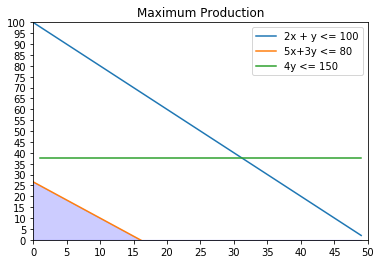

Enter values for a, b and c, separated by spaces  2 1 100
Enter values for a, b and c, separated by spaces  5 3 80
Enter values for a, b and c, separated by spaces  0 4 150
Enter values for a, b and c, separated by spaces  1 0 0 
Enter values for a, b and c, separated by spaces  0 1 0 


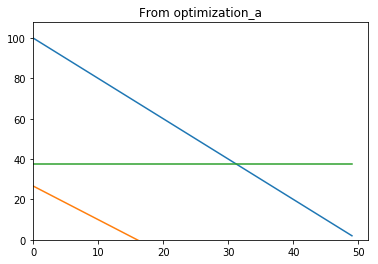

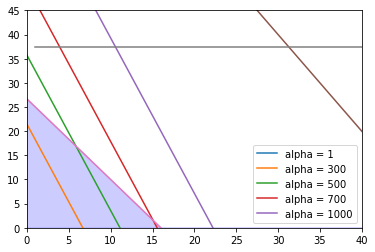

In [9]:
#Exercise 6: a

"""
#the total revenue is equal to the unit revnue of P1(x) and P2(y), minus their production costs
#the simplified expression for revenue is:

# f(x, y) = 45x + 14y = 
"""

# 6: b
"""
For the entire exercise, P1 and P2 will be referred to as x and respectively. 

the production problem may be solved using the given oprimization problem as:
1. the total amount of M1 = 100. Since the production of x requires 2 units of M1, and the production of 
y requires 1 unit of of M1, 2x + y must be less or equal to 100

2. the total amount of M2 = 80. Since the production of x requires 5 units of M2, and the production of 
y requires 3 unit of of M2, 5x + 3y must be less or equal to 80

3.  the total amount of M3 = 150. Since the production of x requires 0 units of M2, and the production of 
y requires 4 unit of of M2, 4y must be less or equal to 150

4. since the company cannot produce negative units of x and y, their production levels have to be greater or equal to zero
#6: c
"""

#6: c
import numpy as np
import matplotlib.pyplot as plt

xx1 = np.arange(0,50,1)

def f1(x):
    return 100-2*x
def f2(x):
    return (80-5*x)/3
def f3(x):
    return (150*x/4)/x

plt.plot(xx1, f1(xx1), xx1, f2(xx1), xx1, f3(xx1))
plt.legend(("2x + y <= 100", "5x+3y <= 80", "4y <= 150"))
plt.title("Maximum Production")
plt.fill_between(xx1, f2(xx1), alpha=0.2, color = "b")
plt.ylim(0,100)
plt.xlim(0,50)
plt.xticks(list(range(0,51,5)))
plt.yticks(list(range(0,101, 5)))
plt.show()

#6: d
import optimization_a 
optimization_a.optim()

#6: e

func_alpha = lambda xx1, alpha: alpha/14 - 45*xx1/14

plt.figure(2)
plt.xlim(0,40)
plt.ylim(0,45)
for alpha in [1, 300, 500, 700, 1000]: 
    plt.plot(xx1, func_alpha(xx1, alpha), label = f"alpha = {alpha}" )
plt.plot(xx1, f1(xx1), xx1, f2(xx1), xx1, f3(xx1))
plt.legend()
    
plt.fill_between(xx1, f2(xx1), alpha=0.2, color = "b")

plt.show()


In [7]:
#6: f
#test different solutions of profit
#t1: 14 P1 + 2 P2
#t2: 15 P1 + 1 P2
#t3: 16 P1 + 0 P2

t1 = 14*45 + 2*14
t2 = 15*45 + 1*14
t3 = 16*45

print("t1 = " + str(t1))
print("t2 = " + str(t2))
print("t3 = " + str(t3))

t1 = 658
t2 = 689
t3 = 720


In [ ]:
#thus, the optimal solution is t3, providing a profit of 720

In [10]:
#Exercise 7

class Person:
    def __init__(self, name, address, phone_number, birth, nationality):
        self.name = name
        self.address = address
        self.phone_number = phone_number
        self.birth = birth
        self.nationality = nationality
    def __str__(self): 
        return str(self.name) + "was born a " + str(self.nationality) + " on " + str(self.birth) + \
        ". He/She currently lives at " + str(self.address) + " and can be reached at " + str(self.phone_number)
    
class Worker(Person):
    def __init__(self, name, address, phone_number, birth, nationality, company_name, company_address, job_number):
        super().__init__(name, address, phone_number, birth, nationality)
        self.company_name = company_name
        self.company_address = company_address
        self.job_number = job_number
    def __str__(self):
        return super().__str__() + \
        ". He/She currently works for " + str(self.company_name) +", in "+str(self.company_address)+ \
        ", and can be reached at " + str(self.job_number) + " when he's not too busy slaying"

class Scientist(Worker):
    def __init__(self, name, address, phone_number, birth, nationality, company_name, company_address, \
                         job_number, dicipline, scientist_type):
        super().__init__(name, address, phone_number, birth, nationality, company_name, company_address, job_number)
        self.dicipline = dicipline
        self.scienctist_type = scientist_type
        
    def __str__(self):
         return super().__str__() +". He's a scientist within:" + str(self.dicipline) + " and uses the mehods" \
         + str(self.scienctist_type)

class Researcher(Scientist):
    pass

class Postdoc(Scientist):
    pass

class Professor(Scientist):
    pass


tim = Worker("Tim Holt", "420 Pussystreet", "1-eat-pussy", "01.04.1985", "canadian",\
             "pornhub", "69 Gangbang Avenue", "1-800-porno")
print(tim)
tim = Researcher("Tim Holt", "420 Pussystreet", "1-eat-pussy", "01.04.1985", "canadian",\
                 "pornhub", "69 Gangbang Avenue", "1-800-porno", ["economics", "finance"],\
                 ["computational", "theoretical"])
print(tim)

Tim Holtwas born a canadian on 01.04.1985. He/She currently lives at 420 Pussystreet and can be reached at 1-eat-pussy. He/She currently works for pornhub, in 69 Gangbang Avenue, and can be reached at 1-800-porno when he's not too busy slaying
Tim Holtwas born a canadian on 01.04.1985. He/She currently lives at 420 Pussystreet and can be reached at 1-eat-pussy. He/She currently works for pornhub, in 69 Gangbang Avenue, and can be reached at 1-800-porno when he's not too busy slaying. He's a scientist within:['economics', 'finance'] and uses the mehods['computational', 'theoretical']
